In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [360]:
nominals = ['Turarjoy turi','Xonalar soni']

In [361]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [362]:

# 📥 Step 1: Load data
df = pd.read_csv("housing_data.csv")  # Replace with your file name
def floor_type(row):
    fl = row['Qavati']
    tot = row['Uy qavatliligi']
    if fl == 1 :
        return 'first'
    if fl == tot :
        return 'last'
    else :
        return 'middle'
df['Qavat_turi'] = df.apply(floor_type, axis=1)

df = df.drop(columns=[ 'Qavati', 'Uy qavatliligi',], errors='ignore')
df2 = df[df['Xonalar soni'] <= 4 ]
df_clean = df[(df['Narx'] >= 35  ) & (df['Narx'] <= 150)
             & (df['Xonalar soni'] <= 4 )
            &( df['Umumiy maydon']<=  122 )
            &( df['Umumiy maydon'] > 22)]
df = df_clean
df.shape

(905, 7)

In [363]:

# 🎯 Step 2: Define features and target
X = df.drop(columns='Narx')
y = df['Narx']

In [364]:

#Step 3: One-hot encode categorical columns
X = pd.get_dummies(X)
X = pd.get_dummies(pd.DataFrame(X), columns = ['Xonalar soni'])
X

,Umumiy maydon,Turarjoy turi_Ikkilamchi bozor,Turarjoy turi_Yangi qurilgan uylar,Mebelli_Ha,Mebelli_Yoʻq,Tuman_Bektemir,Tuman_Chilonzor,Tuman_Mirobod,Tuman_Mirzo-Ulug‘bek,Tuman_Olmazor,...,Tuman_Yakkasaroy,Tuman_Yashnobod,Tuman_Yunusobod,Qavat_turi_first,Qavat_turi_last,Qavat_turi_middle,Xonalar soni_1,Xonalar soni_2,Xonalar soni_3,Xonalar soni_4
3,52.00,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
5,39.00,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
6,65.00,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
7,87.01,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
9,75.00,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,41.00,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
1172,40.00,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1173,45.00,True,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1174,46.00,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [365]:

# 🔢 Step 4: Identify numeric columns to scale
numeric_cols = ['Umumiy maydon']
non_numeric_cols = [col for col in X.columns if col not in numeric_cols]

In [373]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Convert boolean columns to integers (True → 1, False → 0)
X = X.copy()  # optional
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Step 2: Define numeric columns to scale (e.g., real-valued features)
numeric_cols = ['Umumiy maydon']
non_scaled_cols = [col for col in X.columns if col not in numeric_cols]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale only numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Step 5: Polynomial feature transformation
poly = PolynomialFeatures(degree=1, include_bias=True)
poly.fit(X_train_scaled)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 6: Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("R² Score:", round(r2, 4))


R² Score: 0.5922


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7532\3715739936.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7532\3715739936.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Narx'], fit=stats.norm)


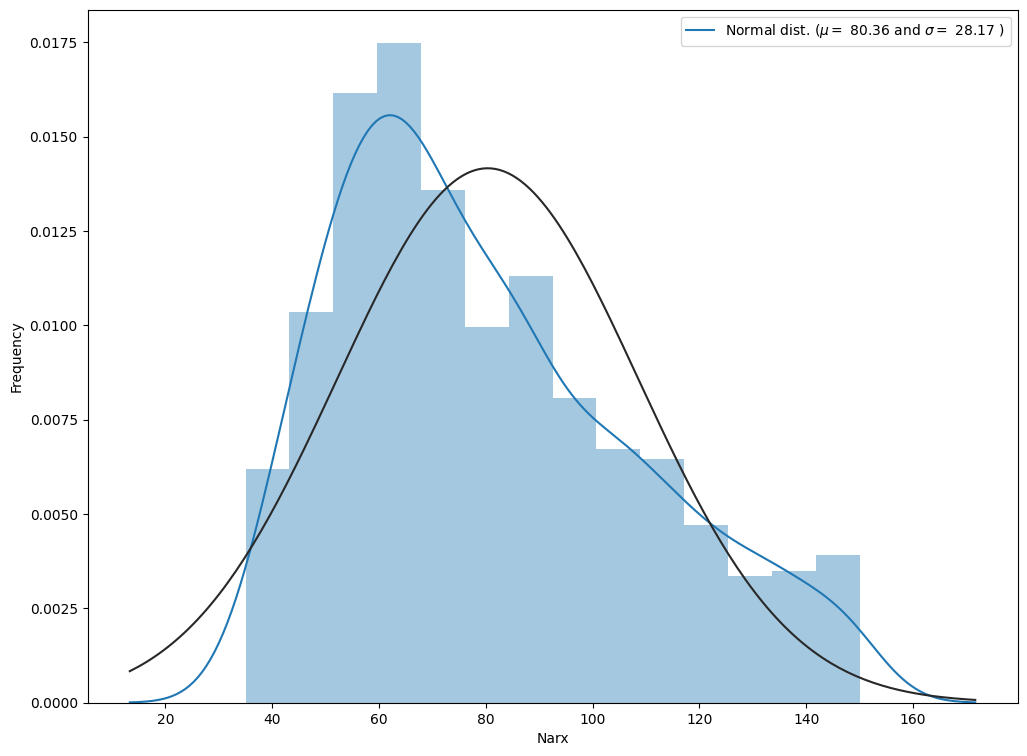

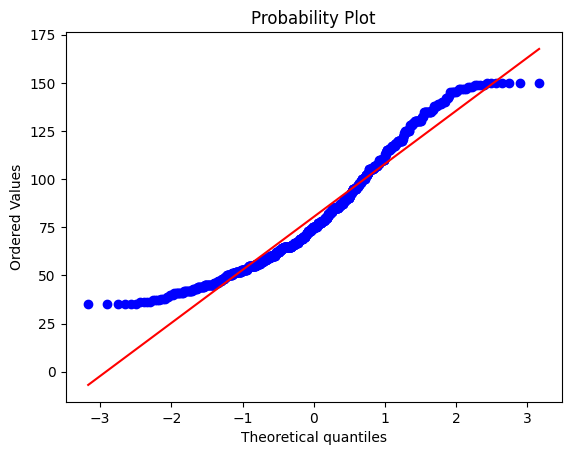

In [367]:
import seaborn as sns
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(df['Narx'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['Narx'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['Narx'], plot=plt)
plt.show()